In [1]:
using Pkg; Pkg.activate(@__DIR__)
# Pkg.instantiate()

  Activating project at `~/Julia_ML_training/unit2`


---
title: "Unit 2 - Processing Data"
engine: julia
jupyter: julia-two-1.11
---

In this unit we focus on **data**. We start by considering basic Julia data structures including dictionaries, sets, named tuples, and others. We then then focus on basic text (string) processing in Julia. Then we move onto Dataframes - a general and useful way to keep tabular data. We then touch on JSON files, and serialization.

# Basic data structures

Beyond [arrays](https://docs.julialang.org/en/v1/base/arrays/) which are very important and include `Vector` and `Matrix`, here are some basic data structures in Julia:

## Dictionaries

*See [Dictionaries in the Julia docs](https://docs.julialang.org/en/v1/base/collections/#Dictionaries).*

Dictionaries (often called hash maps or associative arrays) store key-value pairs. Each key in a dictionary must be unique. They are incredibly useful for many purposes because their looking up values quickly based on a unique identifier. In particular, well designed hash maps are implemented with lookup (get value by key), insertion (insert value to key), and deletion (remove value by key) operations taking average $O(1)$ (constant) time^["Constant time" suffices in practice, there is minutiae and worst case is $O(n)$ which is bad -- for theoretical applications, they can be implemented in $O(\log n)$ worst case time with self-balancing trees, but all practical applications rely on constant time average and engineering tricks to avoid the linear time worst case.]. This makes them very popular both for their simplicity but also to speed up algorithms with smart tricks (like reverse indeces built in hash maps).

In [3]:
d = Dict()

Dict{Any, Any}()

In [ ]:
d[

In [33]:
pop = Dict()
pop["Australia"] = 27_864_000
pop["United States"] = 340_111_000
pop["Finland"] = 5_634_000

5634000

In [5]:
pop

Dict{Any, Any} with 3 entries:
  "United States" => 340111000
  "Finland"       => 5634000
  "Australia"     => 27864000

In [7]:
my_pair = "Australia" => 27_000_000

"Australia" => 27000000

In [8]:
typeof(my_pair)

Pair{String, Int64}

In [9]:
my_pair.first

"Australia"

In [10]:
my_pair.second

27000000

In [12]:
pop2 = Dict(["Australia" => 27_000_000, "United States" => 340_000_000])

Dict{String, Int64} with 2 entries:
  "United States" => 340000000
  "Australia"     => 27000000

In [13]:
typeof(pop2)

Dict{String, Int64}

Infer its type:

In [11]:
@show typeof(pop)

typeof(pop) = Dict{Any, Any}


Dict{Any, Any}

We can restrict the types:

In [14]:
strict_pop = Dict{String,Int}()
strict_pop["Australia"] = 27_864_000
strict_pop["United States"] = 340_111_000
strict_pop["Finland"] = 5_634_000

strict_pop

Dict{String, Int64} with 3 entries:
  "United States" => 340111000
  "Finland"       => 5634000
  "Australia"     => 27864000

In [15]:
# this is okay
pop["North Pole"] = 0.5

0.5

In [16]:
# not okay
strict_pop["North Pole"] = 0.5

LoadError: InexactError: Int64(0.5)

Checking and accessing dictionary values:

In [17]:
# Accessing a value
population_australia = pop["Australia"]
println("Population of Australia: ", population_australia)

mars_pop_safe = get(pop, "Mars", nothing)

Population of Australia: 27864000


In [22]:
mars_pop_safe = get(pop, "Mars", 10)

10

In [20]:
mars_pop_safe === nothing

true

In [18]:
pop

Dict{Any, Any} with 4 entries:
  "North Pole"    => 0.5
  "United States" => 340111000
  "Finland"       => 5634000
  "Australia"     => 27864000

Use `haskey` to check if the key exists:

In [23]:
if haskey(pop, "United States")
    println("United States population exists: ", pop["United States"])
end

if !haskey(pop, "Atlantis")
    println("Atlantis population does not exist.")
end

United States population exists: 340111000
Atlantis population does not exist.


More useful operations:

* `keys()`: Returns an iterable collection of all keys in the dictionary.
* `values()`: Returns an iterable collection of all values in the dictionary.
* `pairs()`: Returns an iterable collection of `Pair` objects (key => value) for all entries.
* `length()`: Returns the number of key-value pairs in the dictionary.
* `empty!()`: Removes all key-value pairs from the dictionary.


In [24]:
keys(pop)

KeySet for a Dict{Any, Any} with 4 entries. Keys:
  "North Pole"
  "United States"
  "Finland"
  "Australia"

In [25]:
values(pop)

ValueIterator for a Dict{Any, Any} with 4 entries. Values:
  0.5
  340111000
  5634000
  27864000

In [26]:
empty(pop)

Dict{Any, Any}()

In [27]:
pop

Dict{Any, Any} with 4 entries:
  "North Pole"    => 0.5
  "United States" => 340111000
  "Finland"       => 5634000
  "Australia"     => 27864000

In [28]:
empty!(pop)

Dict{Any, Any}()

In [29]:
pop

Dict{Any, Any}()

In [31]:
println()
println("Keys in pop: ", keys(pop))
println("Values in pop: ", values(pop))
println("Pairs in pop: ", pairs(pop))
println("Number of entries in pop: ", length(pop))

# Iterating through a dictionary
println()
println("Iterating through pop:")
for (country, population) in pop
    println("$country: $population")
end

# Create a dictionary using the Dict constructor with pairs
new_countries = Dict("Canada" => 38_000_000, "Mexico" => 126_000_000)
println()
println("New countries dictionary: ", new_countries)

# Note that `=>` constructs a pair:
typeof(:s => 2)

# Merging dictionaries (creates a new dictionary)
merged_pop = merge(pop, new_countries)
println("Merged population dictionary: ", merged_pop)

# In-place merge (modifies the first dictionary)
merge!(pop, new_countries)
println("Pop after in-place merge: ", pop)

# Clearing a dictionary
# empty!(pop)
println("Pop after empty!: ", pop)


Keys in pop: Any["United States", "Finland", "Australia"]
Values in pop: Any[340111000, 5634000, 27864000]
Pairs in pop: Dict{Any, Any}("United States" => 340111000, "Finland" => 5634000, "Australia" => 27864000)
Number of entries in pop: 3

Iterating through pop:
United States: 340111000
Finland: 5634000
Australia: 27864000

New countries dictionary: Dict("Mexico" => 126000000, "Canada" => 38000000)
Merged population dictionary: Dict{Any, Any}("United States" => 340111000, "Finland" => 5634000, "Mexico" => 126000000, "Australia" => 27864000, "Canada" => 38000000)
Pop after in-place merge: Dict{Any, Any}("United States" => 340111000, "Finland" => 5634000, "Mexico" => 126000000, "Australia" => 27864000, "Canada" => 38000000)
Pop after empty!: Dict{Any, Any}()


In [34]:
pop

Dict{Any, Any} with 3 entries:
  "United States" => 340111000
  "Finland"       => 5634000
  "Australia"     => 27864000

In [35]:
new_countries = Dict("Canada" => 38_000_000, "Mexico" => 126_000_000)

Dict{String, Int64} with 2 entries:
  "Mexico" => 126000000
  "Canada" => 38000000

In [36]:
merge(pop, new_countries)

Dict{Any, Any} with 5 entries:
  "United States" => 340111000
  "Finland"       => 5634000
  "Mexico"        => 126000000
  "Australia"     => 27864000
  "Canada"        => 38000000

## Sets

See [Set-Like Collections in the Julia docs](https://docs.julialang.org/en/v1/base/collections/#Set-Like-Collections). Here are some examples.

In [37]:
A = Set([2,7,2,3])
B = Set(1:6)
omega = Set(1:10)

Set{Int64} with 10 elements:
  5
  4
  6
  7
  2
  10
  9
  8
  3
  1

In [38]:
AunionB = union(A, B)

Set{Int64} with 7 elements:
  5
  4
  6
  7
  2
  3
  1

In [39]:
AintersectionB = intersect(A, B)
BdifferenceA = setdiff(B,A)
Bcomplement = setdiff(omega,B)
AsymDifferenceB = union(setdiff(A,B),setdiff(B,A))
println("A = $A, B = $B")
println("A union B = $AunionB")
println("A intersection B = $AintersectionB")
println("B diff A = $BdifferenceA")
println("B complement = $Bcomplement")
println("A symDifference B = $AsymDifferenceB")
println("The element '6' is an element of A: $(in(6,A))")
println("Symmetric difference and intersection are subsets of the union: ",
        issubset(AsymDifferenceB,AunionB),", ", issubset(AintersectionB,AunionB))

A = Set([7, 2, 3]), B = Set([5, 4, 6, 2, 3, 1])
A union B = Set([5, 4, 6, 7, 2, 3, 1])
A intersection B = Set([2, 3])
B diff A = Set([5, 4, 6, 1])
B complement = Set([7, 10, 9, 8])
A symDifference B = Set([5, 4, 6, 7, 1])
The element '6' is an element of A: false
Symmetric difference and intersection are subsets of the union: true, true


In [40]:
A

Set{Int64} with 3 elements:
  7
  2
  3

In [41]:
6 in A

false

In [42]:
7 in A

true

Internally, sets are a thin wrapper around dictionaries with no values:

```julia
# base/set.jl
struct Set{T} <: AbstractSet{T}
    dict::Dict{T,Nothing}

    global _Set(dict::Dict{T,Nothing}) where {T} = new{T}(dict)
end
```

## Named tuples

In addition to tuples (see [docs](https://docs.julialang.org/en/v1/manual/types/#Tuple-Types)), Julia has [named tuples](https://docs.julialang.org/en/v1/manual/types/#Named-Tuple-Types). Here are some examples:


In [43]:
my_stuff = (age=28, gender=:male, name="Aapeli")
yonis_stuff = (age=51, gender=:male, name="Yoni")

my_stuff.gender

:male

Named tuples are also used as [keyword arguments](https://docs.julialang.org/en/v1/manual/functions/#Keyword-Arguments).

In [44]:
function my_function_kwargs(; keyword_arg1=default_value1, keyword_arg2=default_value2)
    println("Keyword 1: $keyword_arg1")
    println("Keyword 2: $keyword_arg2")
end

my_function_kwargs (generic function with 1 method)

In [45]:
todays_args = (keyword_arg1="hello!", keyword_arg2="nothing")

(keyword_arg1 = "hello!", keyword_arg2 = "nothing")

In [46]:
my_function_kwargs(; todays_args...)

Keyword 1: hello!
Keyword 2: nothing


An example with Plots:

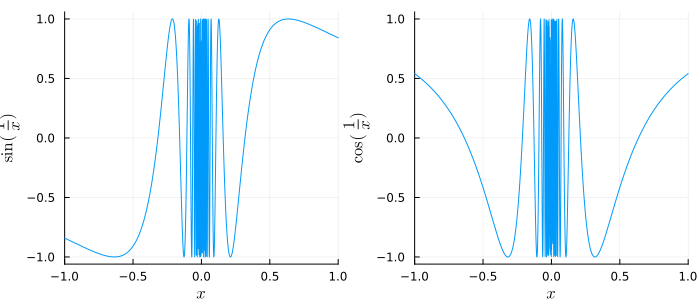

In [47]:
using Plots
using LaTeXStrings

# we can use named tuples to pass in keyword arguments
args = (label=false, xlim=(-1,1), xlabel=L"x")
# `...` is the "splat" operator, similar to `**args` in python
p1 = plot(x->sin(1/x); ylabel=L"\sin(\frac{1}{x})", args...)
p2 = plot(x->cos(1/x); ylabel=L"\cos(\frac{1}{x})", args...)
plot(p1, p2, size=(700,300))

## Structs (Composite Types)

You can obviously define your own types [see composite types in docs](https://docs.julialang.org/en/v1/manual/types/#Composite-Types). You can use `struct` which is by default immutable, or `mutable struct`. In terms of memory management, immutable types sit on the stack while mutable types sit on the heap and require allocations and garbage collection.

In [48]:
struct Place
  name::String
  lon::Float64
  lat::Float64
end

In [49]:
# Constructing Place instances
new_york = Place("New York", -74.0060, 40.7128)
brisbane = Place("Brisbane", 153.0251, -27.4698)
townsville = Place("Townsville", 146.8169, -19.2581)

Place("Townsville", 146.8169, -19.2581)

In [52]:
println(new_york)
println(brisbane)
println(townsville)

Place("New York", -74.006, 40.7128)
Place("Brisbane", 153.0251, -27.4698)
Place("Townsville", 146.8169, -19.2581)


In [53]:
# access fields
println("Latitude of new_york: ", new_york.lat)

Latitude of new_york: 40.7128


We can also have constructors with logic

In [54]:
"""
A fancier place that wraps longitude automatically
"""
struct FancyPlace
  name::String
  lon::Float64
  lat::Float64

  function FancyPlace(name::String, lon::Float64, lat::Float64)
    # make sure longitude is in [-180,180)
    wrapped_lon = mod(lon + 180, 360) - 180
    # new is a special keyword used to create the actual struct instance
    # It takes the values for the fields in the order they are defined in
    # the struct, effectively calling the "primary" constructor
    new(name, wrapped_lon, lat)
  end

  # Custom constructor for an "unnamed" place
  FancyPlace(lon::Float64, lat::Float64) = FancyPlace("[unnamed]", lon, lat) # The `new` keyword calls the primary constructor
end

FancyPlace

In [55]:
# Now we can use the new constructor
unnamed_location = FancyPlace(1000.0, 20.0)
println("\nUnnamed location: ", unnamed_location)
println("Name of unnamed_location: ", unnamed_location.name)


Unnamed location: FancyPlace("[unnamed]", -80.0, 20.0)
Name of unnamed_location: [unnamed]


We can add additional "outer" constructors, but they cannot call `new` directly. For example, suppose you use a GIS package with your own coordinates

In [ ]:
WGS84Coordinates{Float32}

In [ ]:
struct WGS84Coordinates{T}
  x::T
  y::T
end

function FancyPlace(name::String, coords::WGS84Coordinates)
    return FancyPlace(name, Float64(coords.x), Float64(coords.y))
end

In [58]:
coords = WGS84Coordinates{Float32}(142.2, 11.35)

WGS84Coordinates{Float32}(142.2f0, 11.35f0)

In [61]:
coords2 = WGS84Coordinates{String}("a", "b")

WGS84Coordinates{String}("a", "b")

In [62]:
FancyPlace("whatever", coords2)

LoadError: MethodError: no method matching Float64(::String)
The type `Float64` exists, but no method is defined for this combination of argument types when trying to construct it.

[0mClosest candidates are:
[0m  Float64([91m::Float32[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mfloat.jl:341[24m[39m
[0m  Float64([91m::Float16[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mfloat.jl:342[24m[39m
[0m  Float64([91m::IrrationalConstants.Sqrt2[39m)
[0m[90m   @[39m [36mIrrationalConstants[39m [90m~/.julia/packages/IrrationalConstants/lWTip/src/[39m[90m[4mmacro.jl:131[24m[39m
[0m  ...


In [59]:
WGS84Coordinates{Int8}(4, 2)

WGS84Coordinates{Int8}(4, 2)

In [ ]:
mariana_trench = FancyPlace("Mariana Trench", coords)

@show mariana_trench

mariana_trench = FancyPlace("Mariana Trench", 142.1999969482422, 11.350000381469727)


FancyPlace("Mariana Trench", 142.1999969482422, 11.350000381469727)

The [Parameters.jl](https://github.com/mauro3/Parameters.jl) package extends the functionality by automatically creating keyword based constructors for struct beyond the default constructors.

In [63]:
using Parameters

@with_kw struct MyStruct
    a::Int = 6
    b::Float64 = -1.1
    c::UInt8
end

MyStruct(c=4) # call to the constructor created with the @with_kw with a keyword argument

MyStruct
  a: Int64 6
  b: Float64 -1.1
  c: UInt8 0x04


Another useful macro based modification of the language is with the [Accessors.jl](https://github.com/JuliaObjects/Accessors.jl) package. It allows to update values of structs (immutable) easily by creating a copy without having to copy all other values:

In [65]:
using Accessors

a = MyStruct(a=10, c=4)
@show a

a = MyStruct
  a: Int64 10
  b: Float64 -1.1
  c: UInt8 0x04



MyStruct
  a: Int64 10
  b: Float64 -1.1
  c: UInt8 0x04


In [66]:
b = @set a.c = 0
@show b;

b = MyStruct
  a: Int64 10
  b: Float64 -1.1
  c: UInt8 0x00



In [67]:
# but observe a is still untouched
@show a

a = MyStruct
  a: Int64 10
  b: Float64 -1.1
  c: UInt8 0x04



MyStruct
  a: Int64 10
  b: Float64 -1.1
  c: UInt8 0x04


In [68]:
a === b

false

## Datastructures (not in the standard library)

The [JuliaCollections](https://github.com/JuliaCollections) library provides other data structures. One useful package is [DataStructures.jl](https://github.com/JuliaCollections/DataStructures.jl). Let's use for example a heap for [heap sort](https://en.wikipedia.org/wiki/Heapsort) (note that this is only for illustrative purposes. The system's [sort](https://docs.julialang.org/en/v1/base/sort/) will be more efficient).


In [69]:
using Random, DataStructures
Random.seed!(0)

TaskLocalRNG()

In [70]:
function heap_sort!(a::AbstractArray)
    h = BinaryMinHeap{eltype(a)}()
    for e in a
        push!(h, e) #This is an O(log n) operation
    end

    #Write back onto the original array
    for i in 1:length(a)
        a[i] = pop!(h) #This is an O(log n) operation
    end
    return a
end

heap_sort! (generic function with 1 method)

In [71]:
data = [65, 51, 32, 12, 23, 84, 68, 1]
heap_sort!(data)
@show data
@show heap_sort!(["Finland", "USA", "Australia", "Brazil"]);

data = [1, 12, 23, 32, 51, 65, 68, 84]
heap_sort!(["Finland", "USA", "Australia", "Brazil"]) = ["Australia", "Brazil", "Finland", "USA"]


Again, note that this is a bunch slower than the standard lib sort:

In [72]:
using BenchmarkTools

numbers = rand(10_000);

In [73]:
@benchmark sort!(numbers)

BenchmarkTools.Trial: 10000 samples with 5 evaluations per sample.
 Range (min … max):  6.732 μs …  24.202 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     6.920 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   7.100 μs ± 847.746 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▆▆▅█▆                                                       ▁
  ██████▃▅▄▅▂▂▅▄▅█▇▇██▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇▇▆▆▆▇▅▅▅▅▅▄▅▅▅▅▄▄▃▆▅▄▄▅ █
  6.73 μs      Histogram: log(frequency) by time      10.2 μs <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [74]:
@benchmark heap_sort!(numbers)

BenchmarkTools.Trial: 9399 samples with 1 evaluation per sample.
 Range (min … max):  477.083 μs …  2.818 ms  ┊ GC (min … max): 0.00% … 81.38%
 Time  (median):     511.363 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   529.659 μs ± 93.680 μs  ┊ GC (mean ± σ):  2.37% ±  7.42%

  ▄▇███▆▅▃▃▂▂▂▂                                                ▂
  ███████████████▇███▇▇▃▆▅▁▅▁▃▄▁▃▁▁▁▁▁▁▁▁▁▃▁▅▁▃▃▃▅▅▇▇▇▇▇▆▅▆▅▆▇ █
  477 μs        Histogram: log(frequency) by time      1.06 ms <

 Memory estimate: 326.45 KiB, allocs estimate: 14.

# Basic text processing

Here are [strings in the julia docs](https://docs.julialang.org/en/v1/manual/strings/). Let's see some examples:

In [75]:
x = 2

2

In [76]:
"The value of x is $x"

"The value of x is 2"

In [77]:
y = π

π = 3.1415926535897...

In [78]:
"The value of pi $(round(y; digits=2))"

"The value of pi 3.14"

In [80]:
?split

search: split rsplit splat sprint splitdir splitext plot splice! isprint



```
split(str::AbstractString, dlm; limit::Integer=0, keepempty::Bool=true)
split(str::AbstractString; limit::Integer=0, keepempty::Bool=false)
```

Split `str` into an array of substrings on occurrences of the delimiter(s) `dlm`.  `dlm` can be any of the formats allowed by [`findnext`](@ref)'s first argument (i.e. as a string, regular expression or a function), or as a single character or collection of characters.

If `dlm` is omitted, it defaults to [`isspace`](@ref).

The optional keyword arguments are:

  * `limit`: the maximum size of the result. `limit=0` implies no maximum (default)
  * `keepempty`: whether empty fields should be kept in the result. Default is `false` without a `dlm` argument, `true` with a `dlm` argument.

See also [`rsplit`](@ref), [`eachsplit`](@ref).

# Examples

```jldoctest
julia> a = "Ma.rch"
"Ma.rch"

julia> split(a, ".")
2-element Vector{SubString{String}}:
 "Ma"
 "rch"
```


In [81]:
split("Hello, world", ',')

2-element Vector{SubString{String}}:
 "Hello"
 " world"

In [79]:
split("Hello world!")

2-element Vector{SubString{String}}:
 "Hello"
 "world!"

In [85]:
# multiline blocks will clear up whitespace to make life nice with indentation
my_life_story = """
                            I was born
                               in 1935.
                            """

println(my_life_story)

I was born
   in 1935.



In [86]:
ismutable(String)

true

In [87]:
println("A rough ASCII table")
println("Decimal\tHex\tCharacter")
for c in 0x20:0x7E
    println(c,"\t","0x" * string(c,base=16),"\t",Char(c))
end

A rough ASCII table
Decimal	Hex	Character
32	0x20	 
33	0x21	!
34	0x22	"
35	0x23	#
36	0x24	$
37	0x25	%
38	0x26	&
39	0x27	'
40	0x28	(
41	0x29	)
42	0x2a	*
43	0x2b	+
44	0x2c	,
45	0x2d	-
46	0x2e	.
47	0x2f	/
48	0x30	0
49	0x31	1
50	0x32	2
51	0x33	3
52	0x34	4
53	0x35	5
54	0x36	6
55	0x37	7
56	0x38	8
57	0x39	9
58	0x3a	:
59	0x3b	;
60	0x3c	<
61	0x3d	=
62	0x3e	>
63	0x3f	?
64	0x40	@
65	0x41	A
66	0x42	B
67	0x43	C
68	0x44	D
69	0x45	E
70	0x46	F
71	0x47	G
72	0x48	H
73	0x49	I
74	0x4a	J
75	0x4b	K
76	0x4c	L
77	0x4d	M
78	0x4e	N
79	0x4f	O
80	0x50	P
81	0x51	Q
82	0x52	R
83	0x53	S
84	0x54	T
85	0x55	U
86	0x56	V
87	0x57	W
88	0x58	X
89	0x59	Y
90	0x5a	Z
91	0x5b	[
92	0x5c	\
93	0x5d	]
94	0x5e	^
95	0x5f	_
96	0x60	`
97	0x61	a
98	0x62	b
99	0x63	c
100	0x64	d
101	0x65	e
102	0x66	f
103	0x67	g
104	0x68	h
105	0x69	i
106	0x6a	j
107	0x6b	k
108	0x6c	l
109	0x6d	m
110	0x6e	n
111	0x6f	o
112	0x70	p
113	0x71	q
114	0x72	r
115	0x73	s
116	0x74	t
117	0x75	u
118	0x76	v
119	0x77	w
120	0x78	x
121	0x79	y
122	0x7a	z
123	0x7b	{
124	0x7c	|
125

## Regular Expressions

Julia has built-in regex!

In [89]:
text = "Julia is fun!"

"Julia is fun!"

In [90]:
pattern = r"Julia"

r"Julia"

In [92]:
occursin("is", text)

true

In [93]:
occursin(pattern, text)   # true

true

In [94]:
text = "Call me at 0468879289 when I'm home, or 0468879555 if I'm at work"

"Call me at 0468879289 when I'm home, or 0468879555 if I'm at work"

In [95]:
for m in eachmatch(r"04\d{8}", text)
  println("Found phone number $(m.match)")
end

Found phone number 0468879289
Found phone number 0468879555


## Reading and writing files

The `open` function is your primary tool, often used with `do` blocks to ensure files are automatically closed.

To **write** text to a file:

In [114]:
function my_func(f::Function, a::AbstractVector)
    for el ∈ a
        @show f(el)
    end
    return true
end

my_func (generic function with 1 method)

In [112]:
my_func(x -> x^2, [1,2,3])

f(el) = 1
f(el) = 4
f(el) = 9


In [116]:
out = my_func([1,2,3]) do x
    x^2
end

f(el) = 1
f(el) = 4
f(el) = 9


true

In [117]:
out

true

In [100]:
open("work/my_output.txt", "w") do io
    write(io, "Hello from Julia!\n")
    write(io, "This is a second line.")
end

22

Here, `"w"` signifies "write mode." If the file doesn't exist, it's created; if it does, its contents are overwritten.

To **append** text to an existing file:

In [103]:
open("work/my_output.txt", "a") do io
    write(io, "\nAppending a new line.")
end

22

The `"a"` mode means "append." New stuff is added to the end of the file.

To **read** the entire content of a file:

In [104]:
file_content = read("work/my_output.txt", String)
println(file_content)

Hello from Julia!
This is a second line.
Appending a new line.
Appending a new line.


The `read` function with `String` as the type argument reads the whole file into a single string.

For reading a file line by line, which is more memory-efficient for large files:

In [105]:
open("work/my_output.txt", "r") do io
    for line in eachline(io)
        println("Line: ", line)
    end
end

Line: Hello from Julia!
Line: This is a second line.
Line: Appending a new line.
Line: Appending a new line.


## Some extras

The [Printf](https://docs.julialang.org/en/v1/stdlib/Printf/) package is built-in and provides formatted output functions similar to the C standard library.

Strings are related to IO. See the [I/O and Network docs](https://docs.julialang.org/en/v1/base/io-network/). Something quite common is to use `flush(stdout)`.

Sometimes when writing test code we want strings to be approximately equal. For this it is useful to use the [StringDistances.jl](https://github.com/matthieugomez/StringDistances.jl) package.

Consider the [YAML.jl](https://github.com/JuliaData/YAML.jl) package for [YAML files](https://en.wikipedia.org/wiki/YAML).

# Dataframes

Dataframes are huge subject. The Julia [Dataframes.jl](https://github.com/JuliaData/DataFrames.jl) package provides functionality similar to [Python pandas](https://en.wikipedia.org/wiki/Pandas_(software)) or [R dataframes](https://www.geeksforgeeks.org/r-data-frames/).

Let's get started

In [118]:
using DataFrames

## Constructing DataFrames

### From Column-Value Pairs

The most common way to create a DataFrame is by providing column names (as symbols) and their corresponding vectors of data.

In [120]:
# Create a DataFrame with two columns 'a' and 'b'
df = DataFrame(a = [1, 2, 3], b = [2.0, 4.0, 6.0])

Row,a,b
,Int64,Float64
1,1,2.0
2,2,4.0
3,3,6.0


Notice that Julia infers the data types for each column. Here, `a` is `Int64` and `b` is `Float64`.

We can also create DataFrames using `Pairs`:

In [121]:
DataFrame(:c => ["apple", "banana", "cherry"], :d => [true, false, true])

Row,c,d
,String,Bool
1,apple,true
2,banana,false
3,cherry,true


### From Dictionaries

You can also construct a DataFrame from a dictionary where keys are column names (symbols or strings) and values are vectors.

In [122]:
DataFrame(Dict(
    :name => ["Aapeli", "Yoni", "Jesse"],
    :age => [25, 30, 35],
    :city => ["New York", "Brisbane", "Berlin"]
))

Row,age,city,name
,Int64,String,String
1,25,New York,Aapeli
2,30,Brisbane,Yoni
3,35,Berlin,Jesse


### From `NamedTuple`s

Creating a DataFrame from a vector of `NamedTuple`s is very flexible.

In [123]:
DataFrame([
    (id = 1, value = 10.5, tag = "A"),
    (id = 2, value = 20.1, tag = "B"),
    (id = 3, value = 15.0, tag = "C")
])

Row,id,value,tag
,Int64,Float64,String
1,1,10.5,A
2,2,20.1,B
3,3,15.0,C


If the `NamedTuple`s have different fields or different orders, we can use `Tables.dictcolumntable` to fill missing values with `missing`.

In [124]:
DataFrame(Tables.dictcolumntable([
    (id = 1, name = "Julia"),
    (id = 2, score = 95.5),
    (id = 3, name = "DataFrame", type = "Table")
]))

Row,id,name,score,type
,Int64,String?,Float64?,String?
1,1,Julia,missing,missing
2,2,missing,95.5,missing
3,3,DataFrame,missing,Table


In [125]:
Nothing

Nothing

In [126]:
nothing

In [127]:
Missing

Missing

In [128]:
missing

missing

Notice the `?` after the types, indicating that these columns now allow `missing` values.

## Column Names and Basic Information

In DataFrames.jl, columns are primarily accessed using `Symbol`s.

In [130]:
Symbol("a")

:a

In [131]:
:a

:a

In [129]:
df = DataFrame(a = [1, 2, 3], b = [2.0, 4.0, 6.0], c = ["x", "y", "z"])

df[:, :a]

3-element Vector{Int64}:
 1
 2
 3

In [135]:
df

Row,a,b,c
,Int64,Float64,String
1,1,2.0,x
2,2,4.0,y
3,3,6.0,z


You can get the column names:

In [132]:
names(df)

3-element Vector{String}:
 "a"
 "b"
 "c"

In [133]:
df |> names

3-element Vector{String}:
 "a"
 "b"
 "c"

And column types:

In [134]:
eltype.(eachcol(df))

3-element Vector{DataType}:
 Int64
 Float64
 String

### Size and Dimensions

To get the dimensions of a DataFrame, similar to matrices:

In [136]:
size(df) # (rows, columns)

(3, 3)

You can also specify the dimension:

In [137]:
@show size(df, 1) # Number of rows
@show size(df, 2) # Number of columns

size(df, 1) = 3
size(df, 2) = 3


3

### Column-based Storage and Iterators

DataFrames.jl stores data in a column-oriented fashion. This means each column is essentially a `Vector`.

You can retrieve a column using dot syntax or indexing:

In [138]:
df.a # Access column 'a' using dot syntax

3-element Vector{Int64}:
 1
 2
 3

In [139]:
df[!, :b] # Access column 'b' using ! (returns a view, i.e., no copy)

3-element Vector{Float64}:
 2.0
 4.0
 6.0

In [140]:
df[:, :c] # Access column 'c' using :, which makes a copy

3-element Vector{String}:
 "x"
 "y"
 "z"

The difference between `.` and `!` versus `:` for column retrieval is crucial for performance and understanding data manipulation.

In [141]:
df.a === df[!, :a] # They refer to the same underlying data

true

In [142]:
df.a === df[:, :a] # The : operator creates a copy, so they are not the same object

false

In [153]:
part = df[:, :a]

3-element Vector{Int64}:
 2
 3
 4

In [154]:
part = [1,2,3]

3-element Vector{Int64}:
 1
 2
 3

In [155]:
df

Row,a,b,c
,Int64,Float64,String
1,2,2.0,x
2,3,4.0,y
3,4,6.0,z


In [151]:
df[:, :a] = [2,3,4]

3-element Vector{Int64}:
 2
 3
 4

In [152]:
df

Row,a,b,c
,Int64,Float64,String
1,2,2.0,x
2,3,4.0,y
3,4,6.0,z


When you need to iterate through rows, you can use `eachrow(df)`:

In [143]:
for row in eachrow(df)
    println("Row: $(row.a), $(row.b), $(row.c)")
end

Row: 1, 2.0, x
Row: 2, 4.0, y
Row: 3, 6.0, z


Each `row` here is a `DataFrameRow` object, which behaves like a `NamedTuple` for row-wise access.

## Indexing and Slicing

DataFrames can be indexed similar to matrices, but with the added flexibility of column names.

### Positional Indexing

In [145]:
df

Row,a,b,c
,Int64,Float64,String
1,1,2.0,x
2,2,4.0,y
3,3,6.0,z


In [144]:
df[1, 1] # First row, first column

1

In [146]:
df[2, :b] # Second row, column 'b'

4.0

In [147]:
df[1, :] # First row (returns a DataFrameRow)

Row,a,b,c
,Int64,Float64,String
1,1,2.0,x


In [148]:
df[:, 1] # First column (returns a Vector, view)

3-element Vector{Int64}:
 1
 2
 3

### Column Selection

You can select multiple columns by passing a vector of column names (symbols or strings):

In [156]:
df[:, [:a, :c]] # Select columns 'a' and 'c' (creates a new DataFrame)

Row,a,c
,Int64,String
1,2,x
2,3,y
3,4,z


Or exclude columns using `Not`:

In [157]:
df[:, Not(:b)] # Select all columns except 'b'

Row,a,c
,Int64,String
1,2,x
2,3,y
3,4,z


You can combine `Not` with a vector of columns:

In [158]:
df[:, Not([:a, :b])] # Select all columns except 'a' and 'b'

Row,c
,String
1,x
2,y
3,z


### Views vs. Copies

Recall the distinction between `!` and `:` for column access. This also applies to row and full DataFrame indexing.

- `df[!, :colname]` returns a *view* of the column (no copy).
- `df[:, :colname]` returns a *copy* of the column.
- `df[!, [col1, col2]]` returns a *view* of the selected columns (a `SubDataFrame`).
- `df[:, [col1, col2]]` returns a *copy* of the selected columns (a new `DataFrame`).
- `df[!, row_indices, col_indices]` returns a `SubDataFrame` (view).
- `df[row_indices, col_indices]` returns a new `DataFrame` (copy).

Using views (`!`) is more memory-efficient when you don't need a separate copy of the data and want changes to the view to reflect in the original DataFrame. However, views require translating between the parent df indeces and the view indeces, which might in theory cause performance issues in edge cases.

## Getting, Setting, and Mutating Data

You can retrieve, set, and modify individual cells, rows, or columns.

### Setting Individual Values

In [159]:
df[1, :a] = 100 # Set value at row 1, column 'a'

100

### Setting Entire Columns

In [160]:
df.b = [10.0, 20.0, 30.0] # Replace column 'b'

3-element Vector{Float64}:
 10.0
 20.0
 30.0

In [161]:
df

Row,a,b,c
,Int64,Float64,String
1,100,10.0,x
2,3,20.0,y
3,4,30.0,z


If the new column has a different type, it will be converted if possible, or an error will occur. If a column doesn't exist, it will be added.

In [162]:
df.d = ["alpha", "beta", "gamma"] # Add a new column 'd'

3-element Vector{String}:
 "alpha"
 "beta"
 "gamma"

### Broadcasting Assignment

Broadcasting (`.=`) is extremely powerful for performing element-wise operations and assignments efficiently.

In [163]:
df.a = 0

LoadError: ArgumentError: It is only allowed to pass a vector as a column of a DataFrame. Instead use `df[!, col_ind] .= v` if you want to use broadcasting.

In [164]:
df

Row,a,b,c,d
,Int64,Float64,String,String
1,100,10.0,x,alpha
2,3,20.0,y,beta
3,4,30.0,z,gamma


In [165]:
df.a .= 0 # Set all values in column 'a' to 0

3-element Vector{Int64}:
 0
 0
 0

In [166]:
df

Row,a,b,c,d
,Int64,Float64,String,String
1,0,10.0,x,alpha
2,0,20.0,y,beta
3,0,30.0,z,gamma


You can also use it with a scalar or a vector of compatible size:

In [167]:
df.b .= df.b * 2 # Double all values in column 'b'

3-element Vector{Float64}:
 20.0
 40.0
 60.0

In [168]:
df

Row,a,b,c,d
,Int64,Float64,String,String
1,0,20.0,x,alpha
2,0,40.0,y,beta
3,0,60.0,z,gamma


Or apply a function:

In [ ]:
df.c .= uppercase.(df.c) # Convert all strings in column 'c' to uppercase

Broadcasting assignment works with sub-selections as well:

In [ ]:
df[1:2, :a] .= 99 # Set the first two values of column 'a' to 99

# Story: Working with real data

We'll now look at a more in-depth, hands-on exercise of using DataFrames.

The Queensland government has an open data portal, and makes available [tide predictions at various locations](https://www.data.qld.gov.au/dataset/coastal-data-system-tide-data/resource/1311fc19-1e60-444f-b5cf-24687f1c15a7) on the state's coast. (There's some other interesting data as well at <https://www.qld.gov.au/tides>).

Let's use this to do some exploration. We'll first download with the HTTP.jl package and write it to `tides.csv`

In [169]:
using HTTP

response = HTTP.get("https://www.data.qld.gov.au/datastore/dump/1311fc19-1e60-444f-b5cf-24687f1c15a7?bom=True")

HTTP.Messages.Response:
"""
HTTP/1.1 200 OK
Content-Type: application/octet-stream
Transfer-Encoding: chunked
Connection: keep-alive
Date: Tue, 17 Jun 2025 01:42:07 GMT
Server: nginx
Content-Disposition: attachment; filename="1311fc19-1e60-444f-b5cf-24687f1c15a7.csv"
Cache-Control: public, max-age=1800, must-revalidate
Strict-Transport-Security: max-age=31536000
Vary: Cookie
X-Cache: Miss from cloudfront
Via: 1.1 a97e58ffc6f61ef3eab965cbc26fc6f0.cloudfront.net (CloudFront)
X-Amz-Cf-Pop: JFK52-P8
Alt-Svc: h3=":443"; ma=86400
X-Amz-Cf-Id: oIfBGReULQDTCqc86zGr8_lIJhZK2FGCwChYJsAnrHg1Up_nkOj5rA==

﻿_id,Site,Seconds,DateTime,Water Level,Prediction,Residual,Latitude,Longitude
1,abellpoint,1749477600,2025-06-10T00:00,2.669,2.631,0.038,-20.2608,148.7103
2,abellpoint,1749478200,2025-06-10T00:10,2.568,2.548,0.020,-20.2608,148.7103
3,abellpoint,1749478800,2025-06-10T00:20,2.499,2.463,0.036,-20.2608,148.7103
4,abellpoint,1749479400,2025-06-10T00:30,2.407,2.373,0.034,-20.2608,148.7103
5,abellpoint,

In [170]:
write("work/tides.csv", response.body)

1597708

Let's explore the first few lines

In [171]:
open("work/tides.csv") do io
    for i ∈ 1:5
        line = readline(io)
        println(line)
    end
end

﻿_id,Site,Seconds,DateTime,Water Level,Prediction,Residual,Latitude,Longitude
1,abellpoint,1749477600,2025-06-10T00:00,2.669,2.631,0.038,-20.2608,148.7103
2,abellpoint,1749478200,2025-06-10T00:10,2.568,2.548,0.020,-20.2608,148.7103
3,abellpoint,1749478800,2025-06-10T00:20,2.499,2.463,0.036,-20.2608,148.7103
4,abellpoint,1749479400,2025-06-10T00:30,2.407,2.373,0.034,-20.2608,148.7103


We can read it into a dataframe with `CSV.read`, and show the first few lines with `first`

In [172]:
using CSV

df = CSV.read("work/tides.csv", DataFrame);

In [173]:
first(df, 5)

Row,_id,Site,Seconds,DateTime,Water Level,Prediction,Residual,Latitude,Longitude
,Int64,String15,Int64,DateTime,Float64,Float64,Float64,Float64,Float64
1,1,abellpoint,1749477600,2025-06-10T00:00:00,2.669,2.631,0.038,-20.2608,148.71
2,2,abellpoint,1749478200,2025-06-10T00:10:00,2.568,2.548,0.02,-20.2608,148.71
3,3,abellpoint,1749478800,2025-06-10T00:20:00,2.499,2.463,0.036,-20.2608,148.71
4,4,abellpoint,1749479400,2025-06-10T00:30:00,2.407,2.373,0.034,-20.2608,148.71
5,5,abellpoint,1749480000,2025-06-10T00:40:00,2.319,2.283,0.036,-20.2608,148.71


Note the inferred datatypes, including the automatically converted `DateTime`. We can customize this

In [200]:
# we could also do
df32 = CSV.read("work/tides.csv", DataFrame; types=Dict("Site" => String, "Water Level" => Float32, "Prediction" => Float32, "Residual" => Float32, "Latitude" => Float32, "Longitude" => Float32));

In [196]:
first(df32, 5)

Row,_id,Site,Seconds,DateTime,Water Level,Prediction,Residual,Latitude,Longitude
,Int64,String,Int64,DateTime,Float32,Float32,Float32,Float32,Float32
1,1,abellpoint,1749477600,2025-06-10T00:00:00,2.669,2.631,0.038,-20.2608,148.71
2,2,abellpoint,1749478200,2025-06-10T00:10:00,2.568,2.548,0.02,-20.2608,148.71
3,3,abellpoint,1749478800,2025-06-10T00:20:00,2.499,2.463,0.036,-20.2608,148.71
4,4,abellpoint,1749479400,2025-06-10T00:30:00,2.407,2.373,0.034,-20.2608,148.71
5,5,abellpoint,1749480000,2025-06-10T00:40:00,2.319,2.283,0.036,-20.2608,148.71


In [197]:
df32.Site

19350-element PooledArrays.PooledVector{String, UInt32, Vector{UInt32}}:
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 ⋮
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"

In [178]:
println("With Float32s, we saved $(round((1-Base.summarysize(df32)/Base.summarysize(df))*100; digits=2))% memory")

With Float32s, we saved 29.64% memory


(This is silly, don't do it in practice.)

Let's look also at the last rows

In [179]:
last(df, 3)

Row,_id,Site,Seconds,DateTime,Water Level,Prediction,Residual,Latitude,Longitude
,Int64,String15,Int64,DateTime,Float64,Float64,Float64,Float64,Float64
1,19348,whyteislandnx,1750120800,2025-06-17T10:40:00,1.297,1.134,0.163,-27.4017,153.157
2,19349,whyteislandnx,1750121400,2025-06-17T10:50:00,-99.0,1.184,-99.0,-27.4017,153.157
3,19350,whyteislandnx,1750122000,2025-06-17T11:00:00,-99.0,1.234,-99.0,-27.4017,153.157


Here it seems that "-99.0" seems to mean missing. Let's see where it's coming from in the CSV

In [180]:
open("work/tides.csv") do io
    while true
        line = readline(io)
        if contains(line, "-99")
            println(line)
            break
        end
    end
end

1688,bananabank,1749844800,2025-06-14T06:00,-99.000,0.815,-99.000,-27.5411,153.3368


We can tell `CSV.read` to mark values with "-99.000" as `missing`

In [181]:
df = CSV.read("work/tides.csv", DataFrame; missingstring=["-99.000","missing","n/a"])
last(df, 3)

Row,_id,Site,Seconds,DateTime,Water Level,Prediction,Residual,Latitude,Longitude
,Int64,String15,Int64,DateTime,Float64?,Float64,Float64?,Float64,Float64
1,19348,whyteislandnx,1750120800,2025-06-17T10:40:00,1.297,1.134,0.163,-27.4017,153.157
2,19349,whyteislandnx,1750121400,2025-06-17T10:50:00,missing,1.184,missing,-27.4017,153.157
3,19350,whyteislandnx,1750122000,2025-06-17T11:00:00,missing,1.234,missing,-27.4017,153.157


Note the "?" in water level/residual: this is DataFrames notation for columns which contain missing data.

Referring to `Water Level` is a bit annoying now:

In [182]:
:simple

:simple

In [183]:
df[:, Symbol("Water Level")]

19350-element Vector{Union{Missing, Float64}}:
 2.669
 2.568
 2.499
 2.407
 2.319
 2.221
 2.126
 2.034
 1.942
 1.854
 1.801
 1.732
 1.656
 ⋮
 0.907
 0.943
 0.985
 1.03
 1.075
 1.113
 1.159
 1.207
 1.246
 1.297
  missing
  missing

Let's rename it, and let's rename `DateTime` too to avoid confusion:

In [184]:
:WaterLevel

:WaterLevel

In [185]:
Symbol("WaterLevel")

:WaterLevel

In [186]:
# ! means in-place
rename!(df, Symbol("Water Level") => :WaterLevel, Symbol("DateTime") => :Time)
first(df, 5)

Row,_id,Site,Seconds,Time,WaterLevel,Prediction,Residual,Latitude,Longitude
,Int64,String15,Int64,DateTime,Float64?,Float64,Float64?,Float64,Float64
1,1,abellpoint,1749477600,2025-06-10T00:00:00,2.669,2.631,0.038,-20.2608,148.71
2,2,abellpoint,1749478200,2025-06-10T00:10:00,2.568,2.548,0.02,-20.2608,148.71
3,3,abellpoint,1749478800,2025-06-10T00:20:00,2.499,2.463,0.036,-20.2608,148.71
4,4,abellpoint,1749479400,2025-06-10T00:30:00,2.407,2.373,0.034,-20.2608,148.71
5,5,abellpoint,1749480000,2025-06-10T00:40:00,2.319,2.283,0.036,-20.2608,148.71


Drop some redundant columns

In [187]:
select!(df, [:Site, :Latitude, :Longitude, :Time, :WaterLevel, :Prediction])
first(df, 5)

Row,Site,Latitude,Longitude,Time,WaterLevel,Prediction
,String15,Float64,Float64,DateTime,Float64?,Float64
1,abellpoint,-20.2608,148.71,2025-06-10T00:00:00,2.669,2.631
2,abellpoint,-20.2608,148.71,2025-06-10T00:10:00,2.568,2.548
3,abellpoint,-20.2608,148.71,2025-06-10T00:20:00,2.499,2.463
4,abellpoint,-20.2608,148.71,2025-06-10T00:30:00,2.407,2.373
5,abellpoint,-20.2608,148.71,2025-06-10T00:40:00,2.319,2.283


Here is our list of columns:

In [201]:
function string_thing(s::Array{String})
    @show eltype(s)
end

string_thing (generic function with 1 method)

In [202]:
string_thing(["hi", "hello"])

eltype(s) = String


String

In [203]:
string_thing(df.Site)

LoadError: MethodError: no method matching string_thing(::PooledArrays.PooledVector{String15, UInt32, Vector{UInt32}})
The function `string_thing` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  string_thing([91m::Array{String}[39m)
[0m[90m   @[39m [35mMain[39m [90m[4mIn[201]:1[24m[39m


In [188]:
names(df)

6-element Vector{String}:
 "Site"
 "Latitude"
 "Longitude"
 "Time"
 "WaterLevel"
 "Prediction"

Or by piping

In [189]:
df |> names

6-element Vector{String}:
 "Site"
 "Latitude"
 "Longitude"
 "Time"
 "WaterLevel"
 "Prediction"

## Getting to know our data

Let's dive a bit deeper, what do we have?

In [190]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,Type
1,Site,,abellpoint,,whyteislandnx,0,String15
2,Latitude,-26.2292,-28.1721,-27.4382,-19.1266,0,Float64
3,Longitude,152.434,146.91,153.249,153.558,0,Float64
4,Time,,2025-06-10T00:00:00,2025-06-13T17:30:00,2025-06-17T11:00:00,0,DateTime
5,WaterLevel,1.32086,-0.209,1.154,5.141,7544,"Union{Missing, Float64}"
6,Prediction,1.16028,-0.194,1.006,5.009,0,Float64


What are the site names?

In [191]:
unique(df.Site)

18-element Vector{String15}:
 "abellpoint"
 "bananabank"
 "birkdale"
 "coombabahst"
 "hallsbay"
 "husseycreek"
 "maroochydore"
 "rabybay"
 "russellislande"
 "russellislandw"
 "seaforth"
 "tangalooma"
 "theskids"
 "townsvillecard"
 "tweedsbj"
 "wavebreaknc"
 "wavebreakwc"
 "whyteislandnx"

A note on `String15`:

In [193]:
df[1, :Site] = "a very very very long string"

LoadError: ArgumentError: string too large (28) to convert to String15

In [192]:
df.Site

19350-element PooledArrays.PooledVector{String15, UInt32, Vector{UInt32}}:
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 "abellpoint"
 ⋮
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"
 "whyteislandnx"

Let's group by site

In [204]:
# groupby takes a dataframe and a list of columns to group by
by_site = groupby(df, :Site)

Row,Site,Latitude,Longitude,Time,WaterLevel,Prediction
,String15,Float64,Float64,DateTime,Float64?,Float64
1,abellpoint,-20.2608,148.71,2025-06-10T00:00:00,2.669,2.631
2,abellpoint,-20.2608,148.71,2025-06-10T00:10:00,2.568,2.548
3,abellpoint,-20.2608,148.71,2025-06-10T00:20:00,2.499,2.463
4,abellpoint,-20.2608,148.71,2025-06-10T00:30:00,2.407,2.373
5,abellpoint,-20.2608,148.71,2025-06-10T00:40:00,2.319,2.283
6,abellpoint,-20.2608,148.71,2025-06-10T00:50:00,2.221,2.19
7,abellpoint,-20.2608,148.71,2025-06-10T01:00:00,2.126,2.098
8,abellpoint,-20.2608,148.71,2025-06-10T01:10:00,2.034,2.004
9,abellpoint,-20.2608,148.71,2025-06-10T01:20:00,1.942,1.912


This produces a grouped dataframe

In [205]:
typeof(by_site)

GroupedDataFrame{DataFrame}

What's the mean water level per site?

In [206]:
# get the mean function
using Statistics

In [208]:
sqr(x) = x^2

sqr (generic function with 1 method)

In [209]:
minus1(x) = x-1

minus1 (generic function with 1 method)

In [210]:
func = minus1 ∘ sqr

Main.minus1 ∘ Main.sqr

In [211]:
func(3)

8

In [217]:
mean(df.WaterLevel)

missing

In [218]:
collect(skipmissing(df.WaterLevel))

11806-element Vector{Float64}:
 2.669
 2.568
 2.499
 2.407
 2.319
 2.221
 2.126
 2.034
 1.942
 1.854
 1.801
 1.732
 1.656
 ⋮
 0.861
 0.87
 0.907
 0.943
 0.985
 1.03
 1.075
 1.113
 1.159
 1.207
 1.246
 1.297

In [216]:
mean(skipmissing(df.WaterLevel))

1.320860748771807

In [207]:
# enter ∘ with \circ TAB
# combine takes the grouped df and a list of operations
combine(by_site, :WaterLevel => mean ∘ skipmissing => :MeanWaterLevel)

Row,Site,MeanWaterLevel
,String15,Float64
1,abellpoint,1.90048
2,bananabank,1.63338
3,birkdale,1.4233
4,coombabahst,0.294556
5,hallsbay,0.679309
6,husseycreek,NaN
7,maroochydore,0.7242
8,rabybay,1.59861
9,russellislande,0.679444


Here we applied `mean(skipmissing(...))` to the `:WaterLevel` column.

Let's plot the water level at some sites

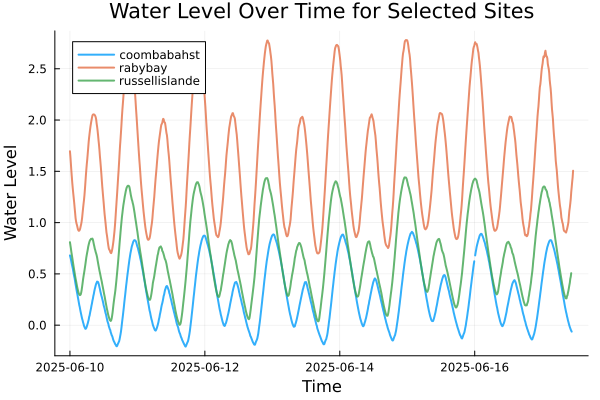

In [219]:
using Plots

my_sites = ["coombabahst", "russellislande", "rabybay"]

p = plot(
    xlabel="Time",
    ylabel="Water Level",
    title="Water Level Over Time for Selected Sites",
    legend=:topleft
)

for group in by_site
    site_name = group.Site[1] # Get the site name from the first row of the group
    # \notin + TAB
    if site_name ∉ my_sites
        continue
    end
    plot!(
        p,
        group.Time,
        group.WaterLevel,
        # Label for the legend
        label=site_name,
        linealpha=0.8,
        linewidth=2
    )
end

p

How many data points do we have per site?

In [221]:
combine(groupby(df, :Site), nrow => :Count)

Row,Site,Count
,String15,Int64
1,abellpoint,1075
2,bananabank,1075
3,birkdale,1075
4,coombabahst,1075
5,hallsbay,1075
6,husseycreek,1075
7,maroochydore,1075
8,rabybay,1075
9,russellislande,1075


In [220]:
combine(by_site, nrow => :Count)

Row,Site,Count
,String15,Int64
1,abellpoint,1075
2,bananabank,1075
3,birkdale,1075
4,coombabahst,1075
5,hallsbay,1075
6,husseycreek,1075
7,maroochydore,1075
8,rabybay,1075
9,russellislande,1075


Let's compute the squared residual:

In [ ]:
df[!, :SqResidual] = (df.WaterLevel - df.Prediction).^2
# or with transform

In [223]:
transform(df, [:WaterLevel, :Prediction] => ((w, p) -> (w-p).^2) => :c)

Row,Site,Latitude,Longitude,Time,WaterLevel,Prediction,SqResidual,c
,String15,Float64,Float64,DateTime,Float64?,Float64,Float64?,Float64?
1,abellpoint,-20.2608,148.71,2025-06-10T00:00:00,2.669,2.631,0.001444,0.001444
2,abellpoint,-20.2608,148.71,2025-06-10T00:10:00,2.568,2.548,0.0004,0.0004
3,abellpoint,-20.2608,148.71,2025-06-10T00:20:00,2.499,2.463,0.001296,0.001296
4,abellpoint,-20.2608,148.71,2025-06-10T00:30:00,2.407,2.373,0.001156,0.001156
5,abellpoint,-20.2608,148.71,2025-06-10T00:40:00,2.319,2.283,0.001296,0.001296
6,abellpoint,-20.2608,148.71,2025-06-10T00:50:00,2.221,2.19,0.000961,0.000961
7,abellpoint,-20.2608,148.71,2025-06-10T01:00:00,2.126,2.098,0.000784,0.000784
8,abellpoint,-20.2608,148.71,2025-06-10T01:10:00,2.034,2.004,0.0009,0.0009
9,abellpoint,-20.2608,148.71,2025-06-10T01:20:00,1.942,1.912,0.0009,0.0009


In [224]:
using DataFramesMeta

There were some sites with fully missing water levels

In [225]:
all_missing = combine(groupby(df, :Site), :WaterLevel => (x -> all(ismissing, x)) => :IsMissing)

Row,Site,IsMissing
,String15,Bool
1,abellpoint,false
2,bananabank,false
3,birkdale,false
4,coombabahst,false
5,hallsbay,false
6,husseycreek,true
7,maroochydore,false
8,rabybay,false
9,russellislande,false


In [228]:
filter!(all_missing) do row
    row.IsMissing == false
end

Row,Site,IsMissing
,String15,Bool
1,abellpoint,false
2,bananabank,false
3,birkdale,false
4,coombabahst,false
5,hallsbay,false
6,maroochydore,false
7,rabybay,false
8,russellislande,false
9,seaforth,false


In [226]:
filter!(row -> row.IsMissing == false, all_missing)

Row,Site,IsMissing
,String15,Bool
1,abellpoint,false
2,bananabank,false
3,birkdale,false
4,coombabahst,false
5,hallsbay,false
6,maroochydore,false
7,rabybay,false
8,russellislande,false
9,seaforth,false


In [229]:
select!(all_missing, Not(:IsMissing))

Row,Site
,String15
1,abellpoint
2,bananabank
3,birkdale
4,coombabahst
5,hallsbay
6,maroochydore
7,rabybay
8,russellislande
9,seaforth


In [230]:
df_clean = innerjoin(df, all_missing, on=:Site)

Row,Site,Latitude,Longitude,Time,WaterLevel,Prediction,SqResidual
,String15,Float64,Float64,DateTime,Float64?,Float64,Float64?
1,abellpoint,-20.2608,148.71,2025-06-10T00:00:00,2.669,2.631,0.001444
2,abellpoint,-20.2608,148.71,2025-06-10T00:10:00,2.568,2.548,0.0004
3,abellpoint,-20.2608,148.71,2025-06-10T00:20:00,2.499,2.463,0.001296
4,abellpoint,-20.2608,148.71,2025-06-10T00:30:00,2.407,2.373,0.001156
5,abellpoint,-20.2608,148.71,2025-06-10T00:40:00,2.319,2.283,0.001296
6,abellpoint,-20.2608,148.71,2025-06-10T00:50:00,2.221,2.19,0.000961
7,abellpoint,-20.2608,148.71,2025-06-10T01:00:00,2.126,2.098,0.000784
8,abellpoint,-20.2608,148.71,2025-06-10T01:10:00,2.034,2.004,0.0009
9,abellpoint,-20.2608,148.71,2025-06-10T01:20:00,1.942,1.912,0.0009


In [231]:
mse_by_site = combine(groupby(df_clean, :Site), :SqResidual => mean ∘ skipmissing => :MSE)

Row,Site,MSE
,String15,Float64
1,abellpoint,0.0171348
2,bananabank,0.015042
3,birkdale,0.0101197
4,coombabahst,0.00739178
5,hallsbay,0.0788607
6,maroochydore,0.00954352
7,rabybay,0.0241192
8,russellislande,0.214871
9,seaforth,0.0128643


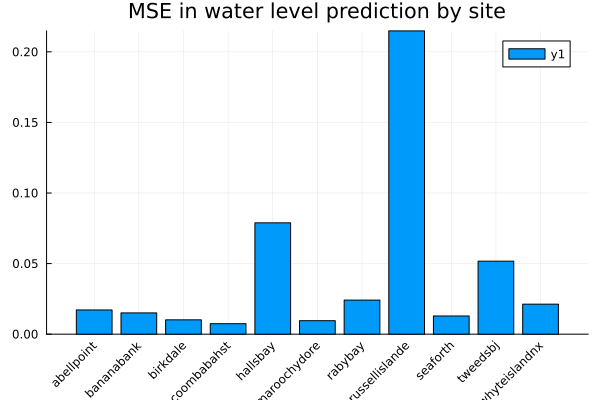

In [232]:
plot(mse_by_site.Site, mse_by_site.MSE, seriestype=:bar, xrotation=45, title="MSE in water level prediction by site")

Let's compute the 90th percentile of water level per site?

In [236]:
# from using Statistics
p90(x) = quantile(x, .9)
p90_by_site = combine(groupby(df_clean, :Site), :WaterLevel => p90 ∘ skipmissing => :WaterLevelP90)

Row,Site,WaterLevelP90
,String15,Float64
1,abellpoint,3.1168
2,bananabank,2.6087
3,birkdale,2.3598
4,coombabahst,0.781
5,hallsbay,1.2929
6,maroochydore,1.2692
7,rabybay,2.5522
8,russellislande,1.293
9,seaforth,4.538


In [268]:
CSV.write("work/p90_by_site.csv", p90_by_site)

"work/p90_by_site.csv"

In [269]:
# or
mse_by_site |> CSV.write("work/mse_by_site.csv")

"work/mse_by_site.csv"

In [ ]:
# we saw this before
by_site = groupby(df, :Site)
# by_site = @groupby(df, :Site)


combine(by_site, :WaterLevel => mean ∘ skipmissing => :MeanWaterLevel)

# with DataFramesMeta
@combine(by_site, :MeanWaterLevel = mean(skipmissing(:WaterLevel)));

In [245]:
# we saw this before
transform(df, [:WaterLevel, :Prediction] => ((w, p) -> (w-p).^2) => :SqErr)
# equivalent with DataFramesMeta
@transform(df, :SqErr = (:WaterLevel - :Prediction).^2);

## More Transformations

Here are key operations:

- [`groupby`](https://dataframes.juliadata.org/stable/lib/functions/#Base.groupby) – Split a DataFrame into groups by one or more columns.
- [`combine`](https://dataframes.juliadata.org/stable/man/split_apply_combine/#Combining-results) – Apply functions to groups or columns and combine results in a new DataFrame.
- [`transform`](https://dataframes.juliadata.org/stable/man/getting_started/#Transforming-data) – Create or modify columns (optionally in-place).
- [`select`](https://dataframes.juliadata.org/stable/man/getting_started/#Selecting-columns) – Select (and transform) columns, optionally creating new ones.

**With [DataFramesMeta.jl](https://juliadata.github.io/DataFramesMeta.jl/stable/):**
- [`@subset`](https://juliadata.github.io/DataFramesMeta.jl/stable/macros/#@subset) – Filter rows based on row-wise conditions.
- [`@select`](https://juliadata.github.io/DataFramesMeta.jl/stable/macros/#@select) – Select or transform columns.
- [`@transform`](https://juliadata.github.io/DataFramesMeta.jl/stable/macros/#@transform) – Add or modify columns by assignment.
- [`@combine`](https://juliadata.github.io/DataFramesMeta.jl/stable/macros/#@combine) – Combine results of group operations into a DataFrame.

For more, see the official [DataFrames.jl documentation](https://dataframes.juliadata.org/stable/) and the [DataFramesMeta.jl documentation](https://juliadata.github.io/DataFramesMeta.jl/stable/).

There are some other great resources on the web:

1. [A PumasAI tutorial](https://tutorials.pumas.ai/html/DataWranglingInJulia/05-mutating-dfmeta.html)
1. [A UQ course tutorial](https://courses.smp.uq.edu.au/MATH2504/2025/lectures_html/lecture-unit-8.html)

## More dataframes

Here are the common packages in this ecosystem:

* [DataFrames.jl](https://github.com/JuliaData/DataFrames.jl) - the main dataframes package.
* [DataFramesMeta.jl](https://github.com/JuliaData/DataFramesMeta.jl) - metaprogramming tools for DataFrames.jl objects.
* [CSV.jl](https://github.com/JuliaData/CSV.jl) - read and write to CSV files.
* [CategoricalArrays.jl](https://github.com/JuliaData/CategoricalArrays.jl) - provides tools for working with categorical variables, both with unordered (nominal variables) and ordered categories (ordinal variables), optionally with missing values.
* [Chain.jl](https://github.com/jkrumbiegel/Chain.jl) - provides a useful macro rewrites a series of expressions into a chain.
* [XLSX.jl](https://github.com/felipenoris/XLSX.jl) - Excel file reader/writer for the Julia language.
* [SummaryTables.jl](https://github.com/PumasAI/SummaryTables.jl) - creating publication-ready tables in HTML, docx, LaTeX and Typst formats.


# JSON

There are two competing [JSON](https://en.wikipedia.org/wiki/JSON) libraries: [JSON.jl](https://github.com/JuliaIO/JSON.jl) and [JSON3.jl](https://github.com/quinnj/JSON3.jl). Here is a `JSON.jl` example:

In [270]:
using HTTP
using JSON

response = HTTP.get("https://couchers.org/api/status")
data = JSON.parse(String(response.body))

println(data)

Dict{String, Any}("coucherCount" => "55414", "version" => "develop-b29739cb", "nonce" => "")


In [267]:
println(JSON.json(Dict("key" => "value", "other_key" => 5)))

{"key":"value","other_key":5}


In [271]:
JSON.json([1,2,3])

"[1,2,3]"

# Serialization

Julia provides out of the box [serialization](https://docs.julialang.org/en/v1/stdlib/Serialization/). Here is an example. The example is slightly interesting because we also create a tree data structure. 

<!-- * struct (mutable & immutable)
* write to file
* read from file -->


In [272]:
using Random

Random.seed!(0)

struct Node
    id::UInt16
    friends::Vector{Node}

    # inner constructor, uses the default constructor
    Node() = new(rand(UInt16), [])
    # another inner constructor
    Node(friend::Node) = new(rand(UInt16),[friend])
end

In [273]:
"""
Makes `n` children to node, each with a single friend
"""
function make_children(node::Node, n::Int, friend::Node)
    for _ in 1:n
        new_node = Node(friend)
        push!(node.friends, new_node)
    end
end;

In [274]:
# make a tree
root = Node()
make_children(root, 3, root)
for node in root.friends
    make_children(node, 2,root)
end

root

Node(0x67db, Node[Node(0x118c, Node[Node(#= circular reference @-4 =#), Node(0xa95f, Node[Node(#= circular reference @-6 =#)]), Node(0x1dc7, Node[Node(#= circular reference @-6 =#)])]), Node(0xdcb5, Node[Node(#= circular reference @-4 =#), Node(0x1c00, Node[Node(#= circular reference @-6 =#)]), Node(0xb3b6, Node[Node(#= circular reference @-6 =#)])]), Node(0x1602, Node[Node(#= circular reference @-4 =#), Node(0x4a1d, Node[Node(#= circular reference @-6 =#)]), Node(0x074f, Node[Node(#= circular reference @-6 =#)])])])

Note that when we try to show `root`, it's complete gibberish. We can write a `Base.show()` function to make this pretty:

In [275]:
# make it show up pretty
function Base.show(io::IO, x::Node)
    shown = Set{Node}()
    function recursive_show(y::Node, depth::Int)
        print(io, "  "^depth*"Node: $(y.id)")
        if y in shown
            println(io, " (already shown)")
        else
            push!(shown, y)
            println(io, ", friends:")
            for f in y.friends
                recursive_show(f, depth+1)
            end
        end
    end
    recursive_show(x, 0)
    return nothing
end

root

Node: 26587, friends:
  Node: 4492, friends:
    Node: 26587 (already shown)
    Node: 43359, friends:
      Node: 26587 (already shown)
    Node: 7623, friends:
      Node: 26587 (already shown)
  Node: 56501, friends:
    Node: 26587 (already shown)
    Node: 7168, friends:
      Node: 26587 (already shown)
    Node: 46006, friends:
      Node: 26587 (already shown)
  Node: 5634, friends:
    Node: 26587 (already shown)
    Node: 18973, friends:
      Node: 26587 (already shown)
    Node: 1871, friends:
      Node: 26587 (already shown)


Suppose we now want to save this in a file...

In [276]:
using Serialization
serialize("work/tree.dat", root)

In [277]:
newroot = deserialize("work/tree.dat")

Node: 26587, friends:
  Node: 4492, friends:
    Node: 26587 (already shown)
    Node: 43359, friends:
      Node: 26587 (already shown)
    Node: 7623, friends:
      Node: 26587 (already shown)
  Node: 56501, friends:
    Node: 26587 (already shown)
    Node: 7168, friends:
      Node: 26587 (already shown)
    Node: 46006, friends:
      Node: 26587 (already shown)
  Node: 5634, friends:
    Node: 26587 (already shown)
    Node: 18973, friends:
      Node: 26587 (already shown)
    Node: 1871, friends:
      Node: 26587 (already shown)


In [278]:
newroot

Node: 26587, friends:
  Node: 4492, friends:
    Node: 26587 (already shown)
    Node: 43359, friends:
      Node: 26587 (already shown)
    Node: 7623, friends:
      Node: 26587 (already shown)
  Node: 56501, friends:
    Node: 26587 (already shown)
    Node: 7168, friends:
      Node: 26587 (already shown)
    Node: 46006, friends:
      Node: 26587 (already shown)
  Node: 5634, friends:
    Node: 26587 (already shown)
    Node: 18973, friends:
      Node: 26587 (already shown)
    Node: 1871, friends:
      Node: 26587 (already shown)


# Additional online resources

* Basic blog post about [Tuples and Vectors, Allocations and Performance for Beginners
](https://jkrumbiegel.com/pages/2020-10-31-tuples-and-vectors/).
* This [introductory post](https://blog.glcs.io/staticarrays) covers [StaticArrays.jl](https://github.com/JuliaArrays/StaticArrays.jl) which is a popular library used in many numerical packages.
* The book @storopolihuijzeralonso2021juliadatascience is a good resource for DataFrames.  
* A paper about `DataFrames.jl` made it into the Journal of Statistical Software, @bouchet2023dataframes.
* A nice "cheatsheet" for dataframes [here](https://www.ahsmart.com/assets/pages/data-wrangling-with-data-frames-jl-cheat-sheet/DataFramesCheatSheet_v1.x_rev1.pdf).
* The book @kaminski2023julia is also written by the main creator of `DataFrames.jl`.
* This [Pumas `DataFramesMeta.jl` tutorial](https://tutorials.pumas.ai/html/DataWranglingInJulia/05-mutating-dfmeta.html) is useful.
* See this [Hacker News](https://news.ycombinator.com/item?id=29360221) discussion around [JSON.jl](https://github.com/JuliaIO/JSON.jl) and [JSON3.jl](https://github.com/quinnj/JSON3.jl).
* This unit used many macros. The proper documentation is [here](https://docs.julialang.org/en/v1/manual/metaprogramming/). This [blog post](https://jkrumbiegel.com/pages/2021-06-07-macros-for-beginners/) is an elementary introduction.

# Exercises

1. You have this dictionary:
```
        country_capital = Dict(
                                "France" => "Paris",
                                "Germany" => "Berlin",
                                "Italy" => "Rome",
                                "Spain" => "Madrid")
```
Now create a new dictionary, `capital_country` where the keys are the capital cities and the values are the country names.

2. Looking up with the `in` or `∈` symbol is possible both in an array and a set. You can create an array with `rand(1:10^10, 10^7)` which will have $10^7$ entries, selected from the numbers $1,\ldots,10^{10}$. You can also wrap this to create a set. Now compare lookup timings with `@time` or `@btime` (from BenchmarkTools.jl) for lookup to see if a single `rand(1:10^10)` is an element of the set.
2. Given the string `text = "Julia is a high-level, high-performance programming language."`, write Julia code to count how many times the substring "high" appears in the text (case-insensitive).
2. Install the `Rdatasets.jl` package. Then load the "iris" dataset. Then, filter the DataFrame to only include rows where the SepalLength is greater than its mean, and display the first five rows of the result.
2. Load the "mtcars" dataset from `RDatasets`. Then, group the data by the `Cyl` (number of cylinders) column and compute the average `MPG` (miles per gallon) for each group. Display the resulting summary DataFrame.
2. Consider this JSON file (put it in a string):
```
                {
                  "name": "Alice",
                  "age": 30,
                  "skills": ["Julia", "Python", "SQL"]
                }
```
Given the JSON string above, write Julia code to parse it and print the person's name and the number of skills they have.

7. Create an array of $10^6$ random `Float64` (you can use `rand(Float64, 3)`). Then serialize and inspect the file size. See it makes sense with `sizeof(Float64)`. Now do the same with `Float16`, `Float32`, `UInt8`, and another type of your choice.
